# 에측 모델 소개 part 1

In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [7]:
df.index.freq = 'MS'

In [9]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [15]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [18]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/Users/ms/dev/_python/series/venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [20]:
test_predictions = fitted_model.forecast(36)

In [22]:
test_predictions

1958-02-01    339.142924
1958-03-01    399.281654
1958-04-01    394.233593
1958-05-01    402.545259
1958-06-01    473.128754
1958-07-01    521.795326
1958-08-01    514.513649
1958-09-01    446.216857
1958-10-01    385.430983
1958-11-01    339.645133
1958-12-01    381.455697
1959-01-01    401.210220
1959-02-01    387.159214
1959-03-01    455.812463
1959-04-01    450.049691
1959-05-01    459.538133
1959-06-01    540.114929
1959-07-01    595.671777
1959-08-01    587.359151
1959-09-01    509.392811
1959-10-01    440.000796
1959-11-01    387.732526
1959-12-01    435.462683
1960-01-01    458.014077
1960-02-01    441.973712
1960-03-01    520.346975
1960-04-01    513.768303
1960-05-01    524.600131
1960-06-01    616.585093
1960-07-01    680.007750
1960-08-01    670.518213
1960-09-01    581.513298
1960-10-01    502.296673
1960-11-01    442.628194
1960-12-01    497.116048
1961-01-01    522.860297
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

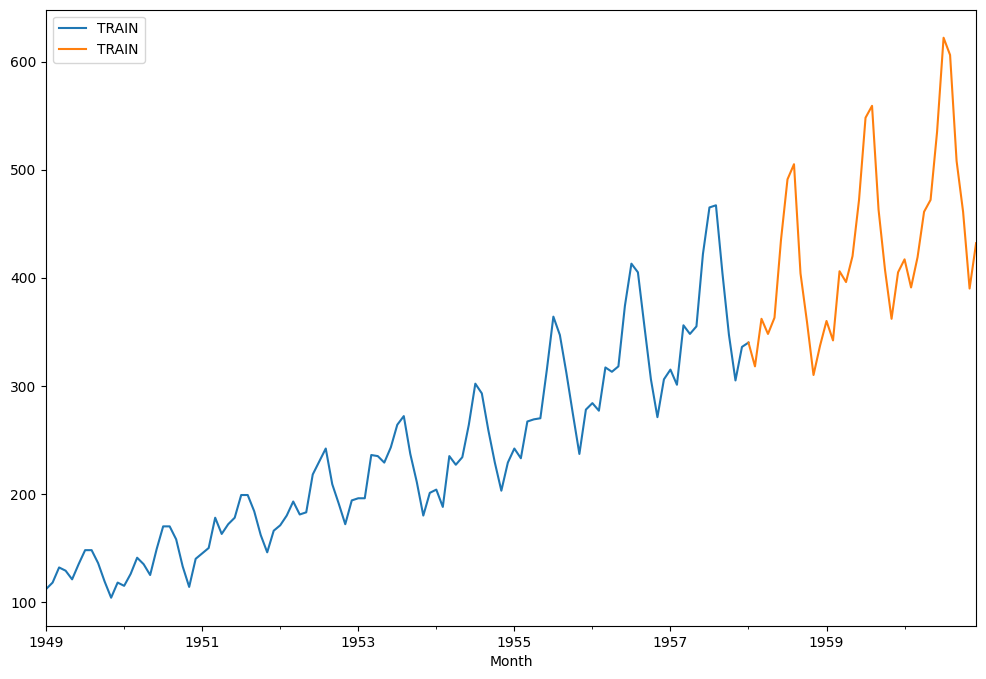

In [26]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='TRAIN')

<Axes: xlabel='Month'>

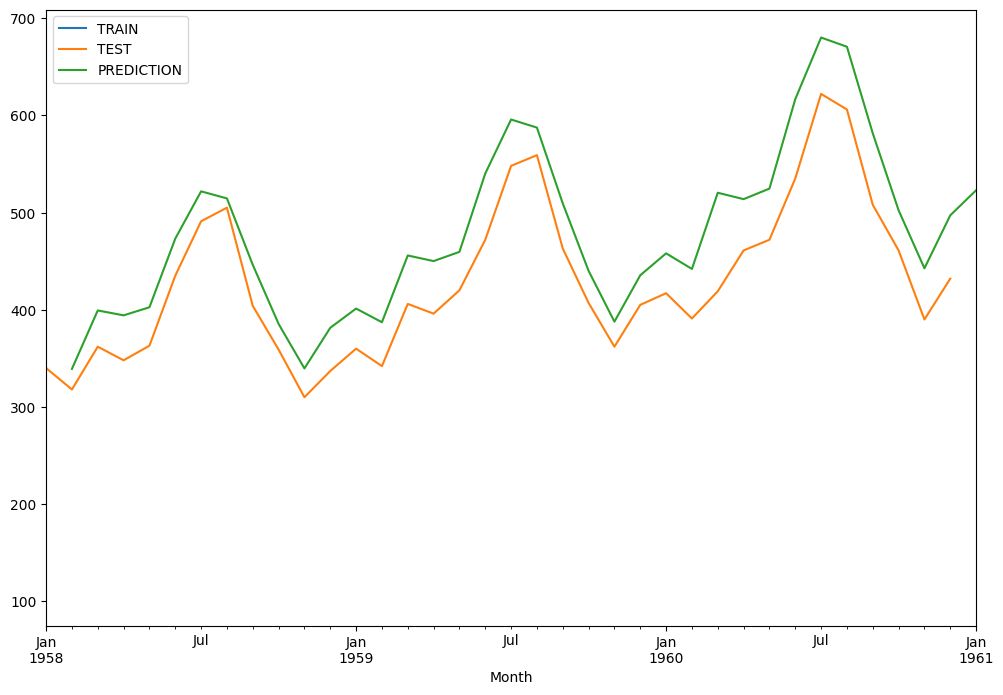

In [28]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION', xlim=['1958-01-01', '1961-01-01'])

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [34]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [31]:
mean_absolute_error(test_data, test_predictions)

63.03118323113166

In [35]:
mean_squared_error(test_data, test_predictions)

5614.270176608041

In [37]:
np.sqrt(mean_squared_error(test_data, test_predictions))

74.92843369915083

In [39]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/Users/ms/dev/_python/series/venv/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [41]:
forecast_predictions = final_model.forecast(36)

<Axes: xlabel='Month'>

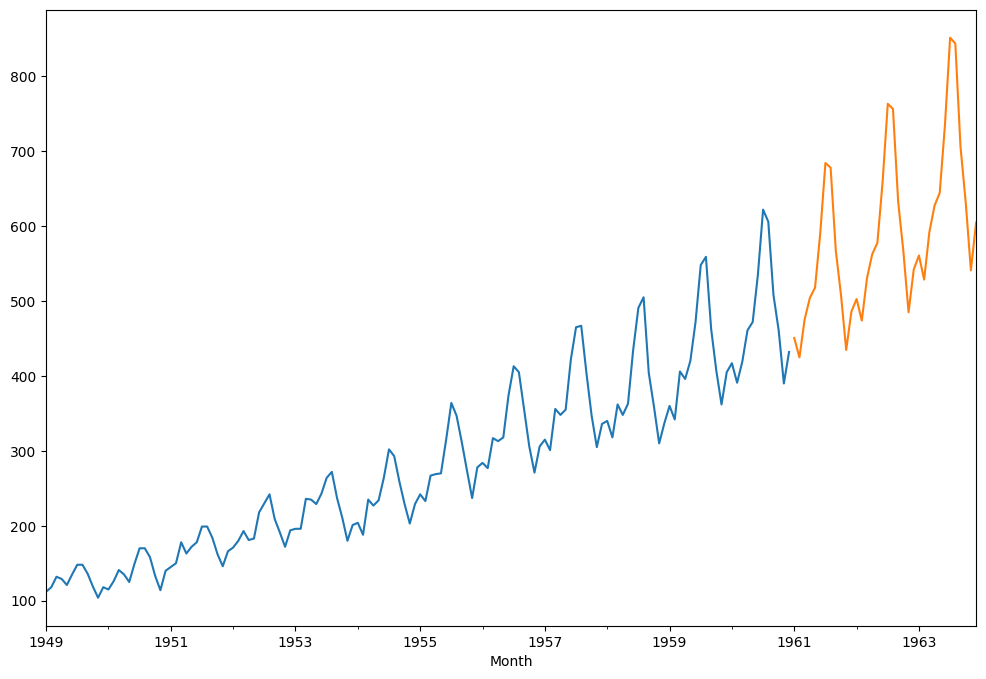

In [45]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()

In [47]:
df2 = pd.read_csv('Data/samples.csv', index_col=0, parse_dates=True)

In [50]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


<Axes: >

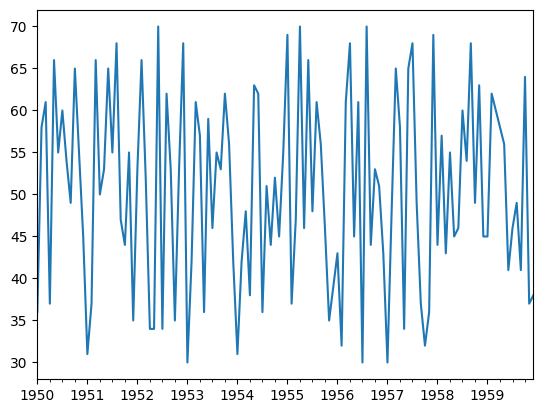

In [52]:
df2['a'].plot() # 정상 데이터 # Stationary Data

<Axes: >

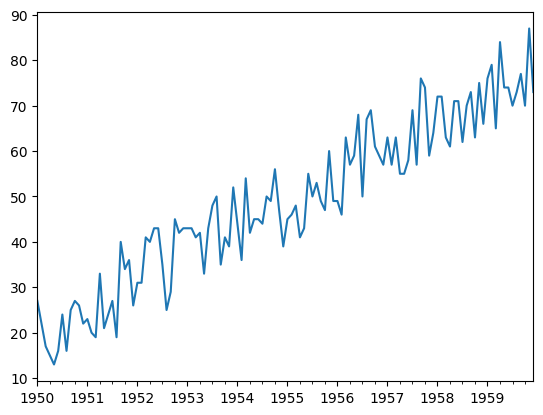

In [54]:
df2['b'].plot() # 비정상 데이터 None Stationary Data

In [55]:
from statsmodels.tsa.statespace.tools import diff

<Axes: >

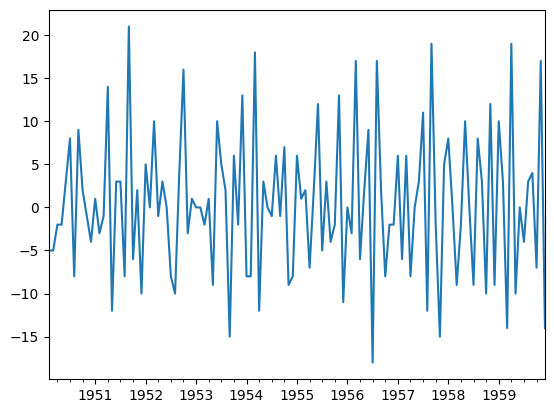

In [62]:
# df2['b'] - df2['b'].shift(1) # 1차 차분
diff(df2['b'], k_diff=1).plot() # diff 함수를 사용한 1차 차분

# 자기상관 함수와 부분 자기상관 함수 Code Along

In [2]:
import pandas as pd
import numpy as np

In [3]:
import statsmodels.api as sm

In [4]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [6]:
# NON STATIONARY
df1 = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq = 'MS'

In [8]:
# STATIONARY
df2 = pd.read_csv('Data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'

In [9]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.DataFrame({'a': [13,5,11,12,9]})

In [17]:
df

,a
0,13
1,5
2,11
3,12
4,9


In [18]:
acf(df['a']) # 자기상관배열

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [22]:
pacf_yw(df['a'],nlags=4, method='adjusted') # 편향 자기상관 계수를 사용하기 위한 것 = method

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [32]:
pacf_ols(df['a'],nlags=2)

array([ 1.        , -0.49677419, -0.43181818])

In [33]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

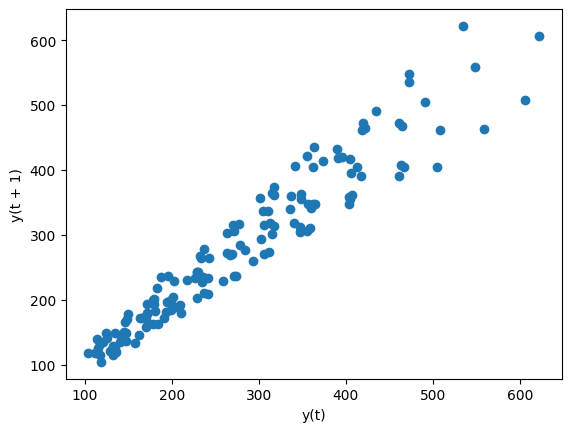

In [35]:
lag_plot(df1['Thousands of Passengers'])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

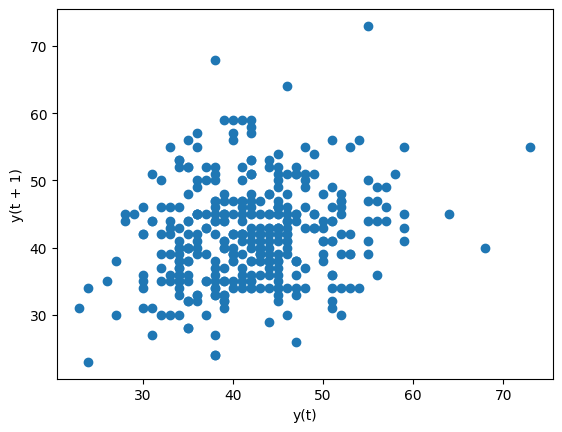

In [37]:
lag_plot(df2['Births'])

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Axes: xlabel='Month'>

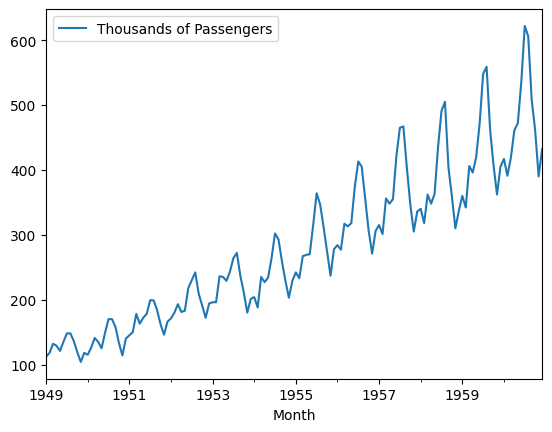

In [40]:
df1.plot()

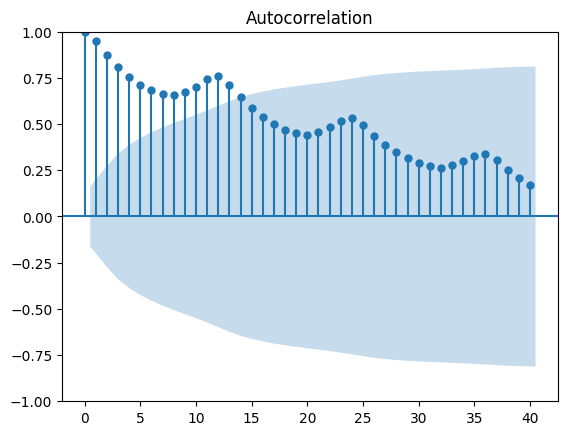

In [44]:
plot_acf(df1, lags=40);

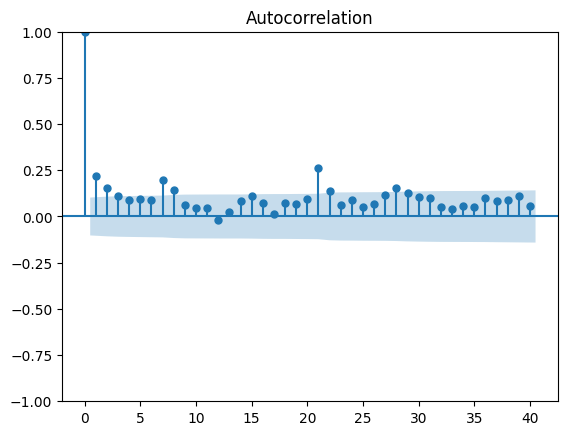

In [47]:
plot_acf(df2, lags=40); # 정상데이터의 자기상관 플롯

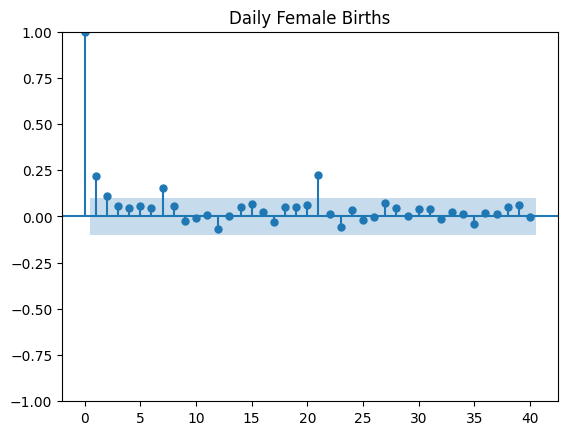

In [49]:
plot_pacf(df2, lags=40, title='Daily Female Births');